# Import Necessary libreries

In [1]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import plot_confusion_matrix
from matplotlib.colors import ListedColormap
zero_one_colourmap = ListedColormap(('red', 'green'))
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as ply
import plotlywidget
import keras
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler,OneHotEncoder,LabelEncoder,Normalizer,OrdinalEncoder
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from keras.activations import softmax,sigmoid,relu,elu,leaky_relu,tanh
from keras.models import Sequential,Model
from keras.layers import Flatten,Dense,Dropout

# Import Dataset

In [3]:
gas_turbine_data=pd.read_csv("./gas_turbines.csv")
gas_turbine_data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


# Data Understanding

In [4]:
gas_turbine_data.shape

(15039, 11)

In [5]:
gas_turbine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [6]:
gas_turbine_data.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [7]:
gas_turbine_data.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [8]:
gas_turbine_data.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


## Outliers Detection

In [9]:
gas_turbine_data.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

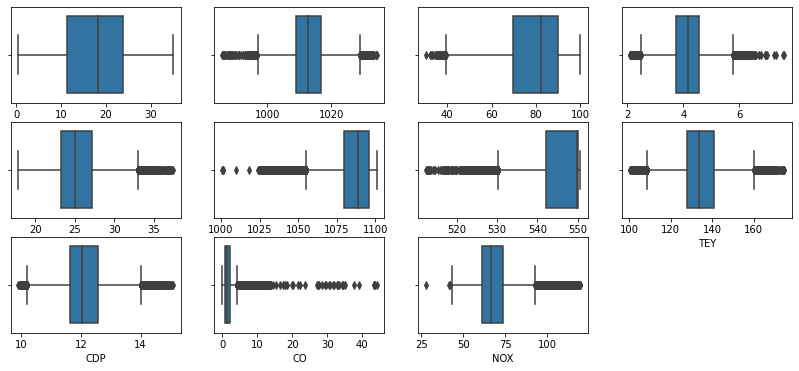

In [10]:
plt.figure(figsize=(14,6))
plt.subplot(3,4,1)
sns.boxplot(gas_turbine_data["AT"],data=gas_turbine_data)
plt.subplot(3,4,2)
sns.boxplot(gas_turbine_data["AP"],data=gas_turbine_data)
plt.subplot(3,4,3)
sns.boxplot(gas_turbine_data["AH"],data=gas_turbine_data)
plt.subplot(3,4,4)
sns.boxplot(gas_turbine_data["AFDP"],data=gas_turbine_data)
plt.subplot(3,4,5)
sns.boxplot(gas_turbine_data["GTEP"],data=gas_turbine_data)
plt.subplot(3,4,6)
sns.boxplot(gas_turbine_data["TIT"],data=gas_turbine_data)
plt.subplot(3,4,7)
sns.boxplot(gas_turbine_data["TAT"],data=gas_turbine_data)
plt.subplot(3,4,8)
sns.boxplot(gas_turbine_data["TEY"],data=gas_turbine_data)
plt.subplot(3,4,9)
sns.boxplot(gas_turbine_data["CDP"],data=gas_turbine_data)
plt.subplot(3,4,10)
sns.boxplot(gas_turbine_data["CO"],data=gas_turbine_data)
plt.subplot(3,4,11)
sns.boxplot(gas_turbine_data["NOX"],data=gas_turbine_data)
plt.show()

In [11]:
q3,q1=np.percentile(gas_turbine_data["AP"],[75,25])
iqr=q3-q1
up_whisker=q3+(1.5*iqr)
lw_whisker=q1-(1.5*iqr)
gas_turbine_data["AP"]=gas_turbine_data["AP"].clip(upper=up_whisker)
gas_turbine_data["AP"]=gas_turbine_data["AP"].clip(lower=lw_whisker)

In [12]:
q3,q1=np.percentile(gas_turbine_data["AH"],[75,25])
iqr=q3-q1
up_whisker=q3+(1.5*iqr)
lw_whisker=q1-(1.5*iqr)
#gas_turbine_data["AH"]=gas_turbine_data["AH"].clip(upper=up_whisker)
gas_turbine_data["AH"]=gas_turbine_data["AH"].clip(lower=lw_whisker)

In [13]:
q3,q1=np.percentile(gas_turbine_data["AFDP"],[75,25])
iqr=q3-q1
up_whisker=q3+(1.5*iqr)
lw_whisker=q1-(1.5*iqr)
gas_turbine_data["AFDP"]=gas_turbine_data["AFDP"].clip(upper=up_whisker)
gas_turbine_data["AFDP"]=gas_turbine_data["AFDP"].clip(lower=lw_whisker)

In [14]:
q3,q1=np.percentile(gas_turbine_data["GTEP"],[75,25])
iqr=q3-q1
up_whisker=q3+(1.5*iqr)
lw_whisker=q1-(1.5*iqr)
gas_turbine_data["GTEP"]=gas_turbine_data["GTEP"].clip(upper=up_whisker)
#gas_turbine_data["GTEP"]=gas_turbine_data["GTEP"].clip(lower=lw_whisker)

In [15]:
q3,q1=np.percentile(gas_turbine_data["TIT"],[75,25])
iqr=q3-q1
up_whisker=q3+(1.5*iqr)
lw_whisker=q1-(1.5*iqr)
#gas_turbine_data["TIT"]=gas_turbine_data["TIT"].clip(upper=up_whisker)
gas_turbine_data["TIT"]=gas_turbine_data["TIT"].clip(lower=lw_whisker)

In [16]:
q3,q1=np.percentile(gas_turbine_data["TAT"],[75,25])
iqr=q3-q1
up_whisker=q3+(1.5*iqr)
lw_whisker=q1-(1.5*iqr)
#gas_turbine_data["TAT"]=gas_turbine_data["TAT"].clip(upper=up_whisker)
gas_turbine_data["TAT"]=gas_turbine_data["TAT"].clip(lower=lw_whisker)

In [17]:
q3,q1=np.percentile(gas_turbine_data["TEY"],[75,25])
iqr=q3-q1
up_whisker=q3+(1.5*iqr)
lw_whisker=q1-(1.5*iqr)
gas_turbine_data["TEY"]=gas_turbine_data["TEY"].clip(upper=up_whisker)
gas_turbine_data["TEY"]=gas_turbine_data["TEY"].clip(lower=lw_whisker)

In [18]:
q3,q1=np.percentile(gas_turbine_data["CDP"],[75,25])
iqr=q3-q1
up_whisker=q3+(1.5*iqr)
lw_whisker=q1-(1.5*iqr)
gas_turbine_data["CDP"]=gas_turbine_data["CDP"].clip(upper=up_whisker)
gas_turbine_data["CDP"]=gas_turbine_data["CDP"].clip(lower=lw_whisker)

In [19]:
q3,q1=np.percentile(gas_turbine_data["CO"],[75,25])
iqr=q3-q1
up_whisker=q3+(1.5*iqr)
lw_whisker=q1-(1.5*iqr)
gas_turbine_data["CO"]=gas_turbine_data["CO"].clip(upper=up_whisker)
#gas_turbine_data["CO"]=gas_turbine_data["CO"].clip(lower=lw_whisker)

In [20]:
q3,q1=np.percentile(gas_turbine_data["NOX"],[75,25])
iqr=q3-q1
up_whisker=q3+(1.5*iqr)
lw_whisker=q1-(1.5*iqr)
gas_turbine_data["NOX"]=gas_turbine_data["NOX"].clip(upper=up_whisker)
gas_turbine_data["NOX"]=gas_turbine_data["NOX"].clip(lower=lw_whisker)

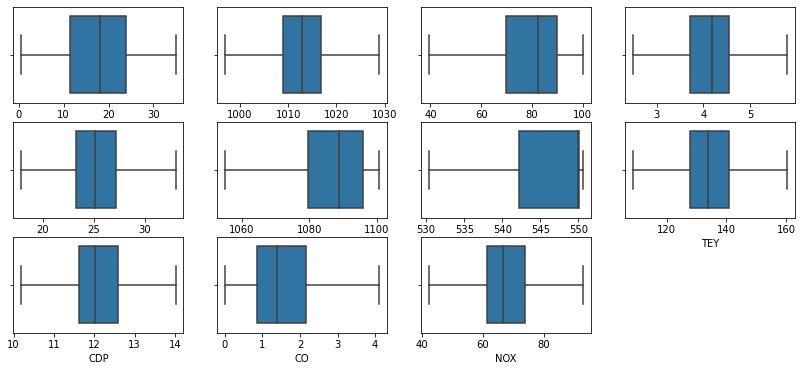

In [21]:
plt.figure(figsize=(14,6))
plt.subplot(3,4,1)
sns.boxplot(gas_turbine_data["AT"],data=gas_turbine_data)
plt.subplot(3,4,2)
sns.boxplot(gas_turbine_data["AP"],data=gas_turbine_data)
plt.subplot(3,4,3)
sns.boxplot(gas_turbine_data["AH"],data=gas_turbine_data)
plt.subplot(3,4,4)
sns.boxplot(gas_turbine_data["AFDP"],data=gas_turbine_data)
plt.subplot(3,4,5)
sns.boxplot(gas_turbine_data["GTEP"],data=gas_turbine_data)
plt.subplot(3,4,6)
sns.boxplot(gas_turbine_data["TIT"],data=gas_turbine_data)
plt.subplot(3,4,7)
sns.boxplot(gas_turbine_data["TAT"],data=gas_turbine_data)
plt.subplot(3,4,8)
sns.boxplot(gas_turbine_data["TEY"],data=gas_turbine_data)
plt.subplot(3,4,9)
sns.boxplot(gas_turbine_data["CDP"],data=gas_turbine_data)
plt.subplot(3,4,10)
sns.boxplot(gas_turbine_data["CO"],data=gas_turbine_data)
plt.subplot(3,4,11)
sns.boxplot(gas_turbine_data["NOX"],data=gas_turbine_data)
plt.show()

### Observations:
#### Outliers rescaled and adjusted

### output variable

In [22]:
gas_turbine_data.TEY.nunique()

3365

In [23]:
gas_turbine_data.TEY.max()

160.25999999999996

In [24]:
gas_turbine_data.TEY.min()

108.62000000000003

In [25]:
gas_turbine_data.TEY.mean()

133.98004189108445

In [26]:
gas_turbine_data.TEY.median()

133.78

In [27]:
gas_turbine_data.TEY.shape

(15039,)

## Correlation Matrix and Heatmap

In [28]:
corr=gas_turbine_data.corr()
corr

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.418513,-0.549401,-0.094637,-0.038612,0.070494,0.318631,-0.189465,-0.087453,-0.040111,-0.620892
AP,-0.418513,1.000000,0.041254,0.048586,0.073405,0.049244,-0.204923,0.139721,0.121863,-0.004676,0.260542
AH,-0.549401,0.041254,1.000000,-0.128245,-0.207373,-0.253373,0.017643,-0.119019,-0.187677,0.208426,0.143695
AFDP,-0.094637,0.048586,-0.128245,1.000000,0.744401,0.652676,-0.567755,0.719048,0.728774,-0.446362,-0.012063
GTEP,-0.038612,0.073405,-0.207373,0.744401,1.000000,0.902916,-0.749912,0.976534,0.993895,-0.701880,-0.190059
TIT,0.070494,0.049244,-0.253373,0.652676,0.902916,1.000000,-0.426887,0.919949,0.916574,-0.810673,-0.122116
TAT,0.318631,-0.204923,0.017643,-0.567755,-0.749912,-0.426887,1.000000,-0.709377,-0.735287,0.274480,0.031914
TEY,-0.189465,0.139721,-0.119019,0.719048,0.976534,0.919949,-0.709377,1.000000,0.988469,-0.733001,-0.064293
CDP,-0.087453,0.121863,-0.187677,0.728774,0.993895,0.916574,-0.735287,0.988469,1.000000,-0.719473,-0.145713
CO,-0.040111,-0.004676,0.208426,-0.446362,-0.701880,-0.810673,0.274480,-0.733001,-0.719473,1.000000,0.193868


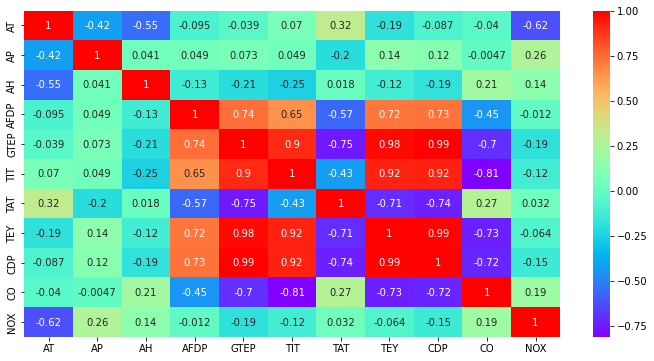

In [29]:
plt.figure(figsize=(12,6))
sns.heatmap(corr,cmap='rainbow',annot=True)
plt.show()

In [30]:
%matplotlib inline
plt.figure(figsize=(12,6))
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.00,-0.42,-0.55,-0.09,-0.04,0.07,0.32,-0.19,-0.09,-0.04,-0.62
AP,-0.42,1.00,0.04,0.05,0.07,0.05,-0.20,0.14,0.12,-0.00,0.26
AH,-0.55,0.04,1.00,-0.13,-0.21,-0.25,0.02,-0.12,-0.19,0.21,0.14
AFDP,-0.09,0.05,-0.13,1.00,0.74,0.65,-0.57,0.72,0.73,-0.45,-0.01
GTEP,-0.04,0.07,-0.21,0.74,1.00,0.90,-0.75,0.98,0.99,-0.70,-0.19
TIT,0.07,0.05,-0.25,0.65,0.90,1.00,-0.43,0.92,0.92,-0.81,-0.12
TAT,0.32,-0.20,0.02,-0.57,-0.75,-0.43,1.00,-0.71,-0.74,0.27,0.03
TEY,-0.19,0.14,-0.12,0.72,0.98,0.92,-0.71,1.00,0.99,-0.73,-0.06
CDP,-0.09,0.12,-0.19,0.73,0.99,0.92,-0.74,0.99,1.00,-0.72,-0.15
CO,-0.04,-0.00,0.21,-0.45,-0.70,-0.81,0.27,-0.73,-0.72,1.00,0.19


<Figure size 864x432 with 0 Axes>

### Understanding the pattern of the data

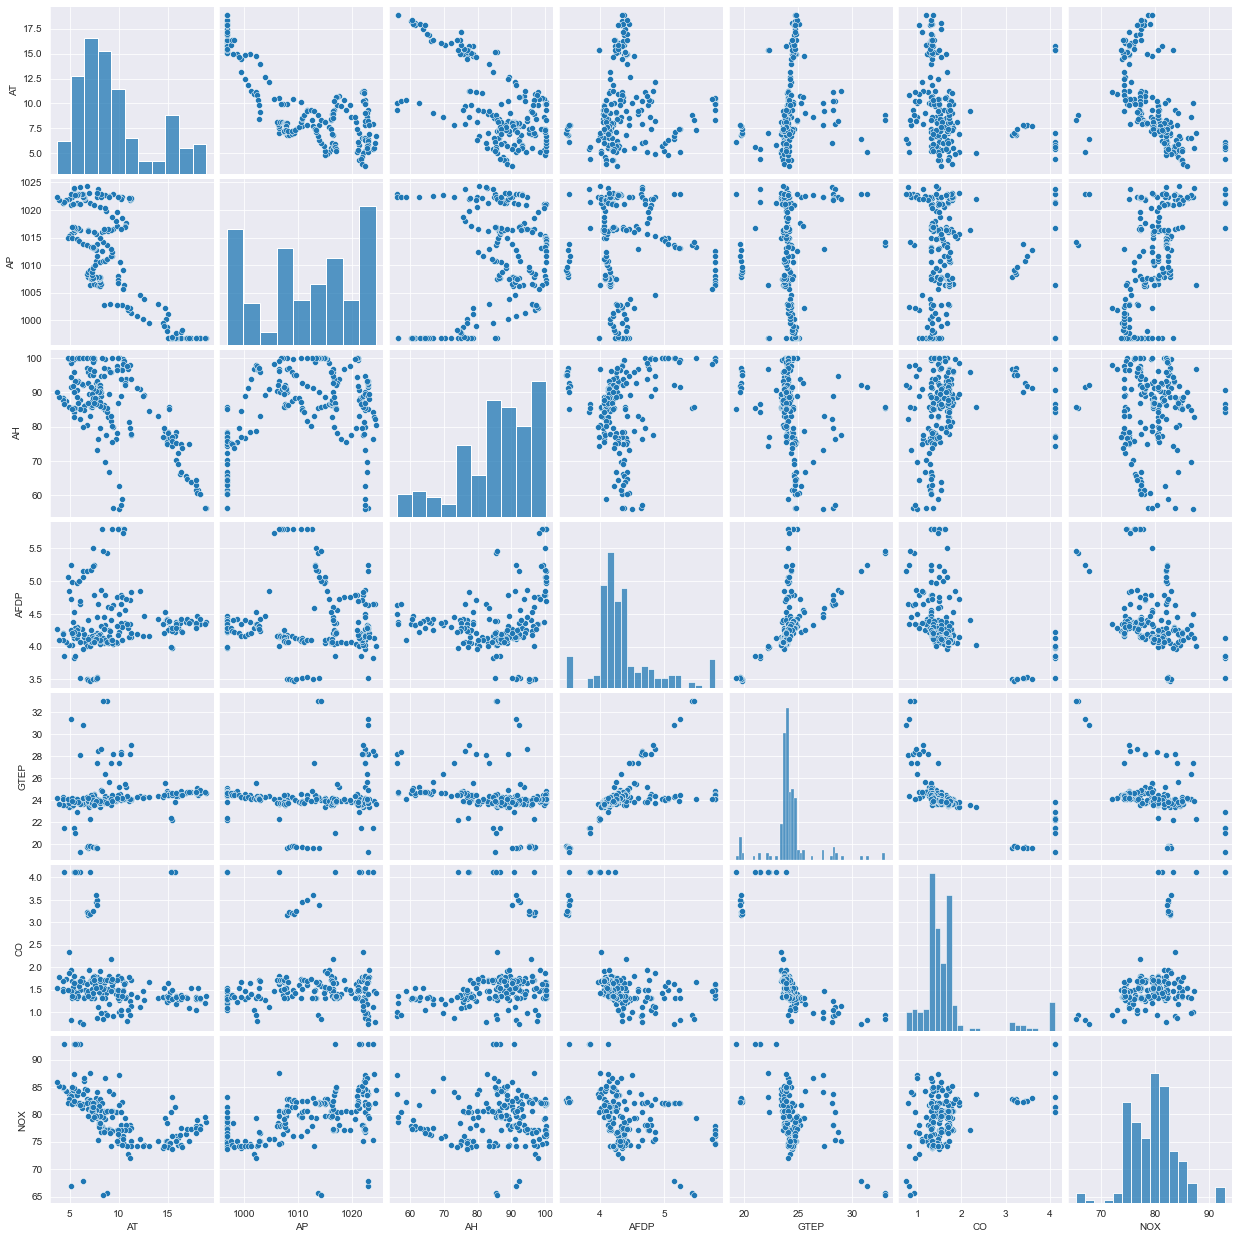

In [65]:
sns.set_style(style='darkgrid')
sns.pairplot(gas_turbine_data.iloc[:200,[0,1,2,3,4,9,10]])

### Joinplot

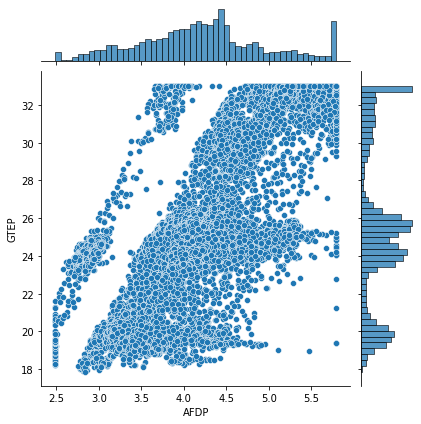

In [32]:
sns.jointplot(x="AFDP",y="GTEP",data=gas_turbine_data,kind='scatter',palette="rainbow")

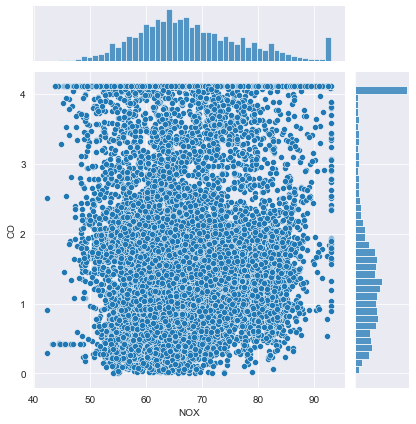

In [66]:
sns.jointplot(x="NOX",y="CO",data=gas_turbine_data,kind='scatter',palette="rainbow")

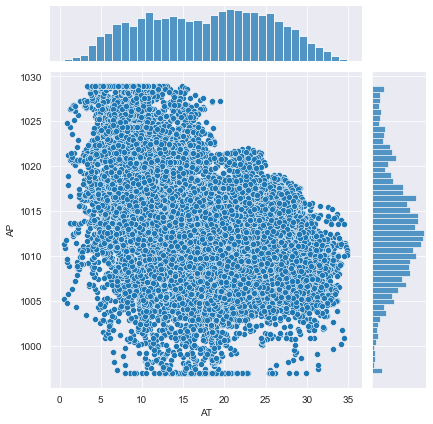

In [67]:
sns.jointplot(x="AT",y="AP",data=gas_turbine_data,kind='scatter',palette="rainbow")

### Observation
####  1. These plot helps understanding the pattern of the data
####  2.Seaborn's jointplot displays    relationship between 2 variables 

# Data Preprocessing

In [33]:
gas_turbine_data_1=gas_turbine_data.copy()
gas_turbine_data_1.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [34]:
gas_turbine_data_1.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [35]:
X=gas_turbine_data_1.drop(columns=["TEY","TIT","CDP"],axis=1)
y=gas_turbine_data_1[["TEY"]]

In [36]:
std=StandardScaler()
le_encoder=LabelEncoder()

In [37]:
X_scaled=std.fit_transform(X)

In [38]:
X_scaled=pd.DataFrame(data=X_scaled,columns=X.columns)
X_scaled.head()

,AT,AP,AH,AFDP,GTEP,TAT,CO,NOX
0,-1.439778,-0.844829,1.283155,-0.944088,-1.393814,0.602477,1.236938,1.546399
1,-1.449601,-0.765376,1.306324,-0.944361,-1.377983,0.602477,1.306924,1.552041
2,-1.434721,-0.701813,1.220692,-0.968070,-1.365561,0.584288,1.276820,1.519862
3,-1.413702,-0.638251,1.170576,-0.970658,-1.362395,0.601078,1.269186,1.540966
4,-1.368693,-0.558797,1.163385,-0.947358,-1.368971,0.599679,1.317302,1.503460


In [39]:
X_scaled.shape,y.shape

((15039, 8), (15039, 1))

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled , y ,test_size = 0.30,random_state = 12)

In [41]:
X_train.shape,y_train.shape

((10527, 8), (10527, 1))

In [42]:
X_test.shape,y_test.shape

((4512, 8), (4512, 1))

In [43]:
gas_turbine_data_1.head(2)

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.0,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.0,114.72,10.598,3.2363,82.776


In [44]:
X_dataframe=X_scaled[["AFDP","GTEP"]]
X_dataframe["TEY"]=gas_turbine_data_1[["TEY"]]
X_dataframe

,AFDP,GTEP,TEY
0,-0.944088,-1.393814,114.70
1,-0.944361,-1.377983,114.72
2,-0.968070,-1.365561,114.71
3,-0.970658,-1.362395,114.72
4,-0.947358,-1.368971,114.72
...,...,...,...
15034,-0.886724,-1.515351,111.61
15035,-0.936049,-1.454461,111.78
15036,-0.975427,-1.426208,110.19
15037,-1.014125,-1.463472,110.74


In [45]:
X_data=X_dataframe.iloc[: , :-1]
y_data=X_dataframe.iloc[:,-1]

In [46]:
X_train_2,X_test_2,y_train_2,y_test_2 = train_test_split(X_data,y_data ,test_size = 0.30,random_state = 12)

In [47]:
gas_turbine_data.TEY.nunique()

3365

## Model Building

### 1. Model Architecture

In [48]:
model=Sequential()

In [49]:
model.add(Flatten(input_shape=(8,)))
model.add(Dropout(rate=0.3))
model.add(Dense(units=300,activation='relu',kernel_initializer='glorot_uniform'))
model.add(Dropout(rate=0.3))
model.add(Dense(units=150,activation='relu',kernel_initializer='glorot_uniform'))
model.add(Dropout(rate=0.3))
model.add(Dense(units=50,activation='relu',kernel_initializer='glorot_uniform'))
model.add(Dense(units=1,activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 8)                 0         
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense (Dense)               (None, 300)               2700      
                                                                 
 dropout_1 (Dropout)         (None, 300)               0         
                                                                 
 dense_1 (Dense)             (None, 150)               45150     
                                                                 
 dropout_2 (Dropout)         (None, 150)               0         
                                                                 
 dense_2 (Dense)             (None, 50)                7

### 2.Model Compilation

In [50]:
model.compile(optimizer="Adam",loss="mean_squared_error",metrics=["mean_absolute_percentage_error","mean_squared_error"])

### 3. Model Training

In [51]:
model_training=model.fit(x=X_train,y=y_train,batch_size=15,epochs=15,validation_data=(X_test,y_test))

Epoch 1/15
702/702 [==============================] - 4s 4ms/step - loss: 1372.6649 - mean_absolute_percentage_error: 17.9279 - mean_squared_error: 1372.6649 - val_loss: 97.6842 - val_mean_absolute_percentage_error: 5.2774 - val_mean_squared_error: 97.6842
Epoch 2/15
702/702 [==============================] - 3s 4ms/step - loss: 179.0365 - mean_absolute_percentage_error: 7.9334 - mean_squared_error: 179.0365 - val_loss: 22.1391 - val_mean_absolute_percentage_error: 2.8030 - val_mean_squared_error: 22.1391
Epoch 3/15
702/702 [==============================] - 3s 4ms/step - loss: 162.0657 - mean_absolute_percentage_error: 7.5573 - mean_squared_error: 162.0657 - val_loss: 66.8880 - val_mean_absolute_percentage_error: 5.1323 - val_mean_squared_error: 66.8880
Epoch 4/15
702/702 [==============================] - 3s 4ms/step - loss: 151.6297 - mean_absolute_percentage_error: 7.3330 - mean_squared_error: 151.6297 - val_loss: 16.9724 - val_mean_absolute_percentage_error: 2.4126 - val_mean_squa

### 4. Model Evaluation

In [52]:
model_result=model.evaluate(x=X_test,y=y_test)

141/141 [==============================] - 1s 3ms/step - loss: 16.5059 - mean_absolute_percentage_error: 2.3456 - mean_squared_error: 16.5059


In [53]:
print('Model Loss     - ',round(model_result[0],2))
print('Mean_absolute_percentage_error - ',round(model_result[1],2))
print('mean_squared_error:  - ',round(model_result[2],2))

Model Loss     -  16.51
Mean_absolute_percentage_error -  2.35
mean_squared_error:  -  16.51


### Model Prediction

In [54]:
y_pred=model.predict(X_test)

In [55]:
y_pred_df=pd.DataFrame(data=y_pred,columns=y_test.columns)
y_pred_df

,TEY
0,114.252151
1,124.265511
2,133.029236
3,155.787704
4,134.079498
...,...
4507,135.311340
4508,134.171097
4509,116.469261
4510,160.254730


In [56]:
y_test

,TEY
4841,112.06
6730,127.18
7694,132.70
9566,159.95
6017,132.85
...,...
8007,133.56
5394,133.73
14601,112.90
917,159.87


### Model Performance

In [57]:
model_training.history

{'loss': [1372.6649169921875,
  179.03652954101562,
  162.06568908691406,
  151.62974548339844,
  143.39300537109375,
  146.62716674804688,
  140.78204345703125,
  131.711181640625,
  133.5386962890625,
  127.67426300048828,
  128.62887573242188,
  121.19066619873047,
  122.06073760986328,
  116.81024169921875,
  114.10028839111328],
 'mean_absolute_percentage_error': [17.92790985107422,
  7.93341588973999,
  7.557331085205078,
  7.332968235015869,
  7.093838214874268,
  7.180582523345947,
  7.011603355407715,
  6.75320291519165,
  6.832318305969238,
  6.7043375968933105,
  6.719033718109131,
  6.54807710647583,
  6.507387161254883,
  6.368224143981934,
  6.297978401184082],
 'mean_squared_error': [1372.6649169921875,
  179.03652954101562,
  162.06568908691406,
  151.62974548339844,
  143.39300537109375,
  146.62716674804688,
  140.78204345703125,
  131.711181640625,
  133.5386962890625,
  127.67426300048828,
  128.62887573242188,
  121.19066619873047,
  122.06073760986328,
  116.81024

### Plots

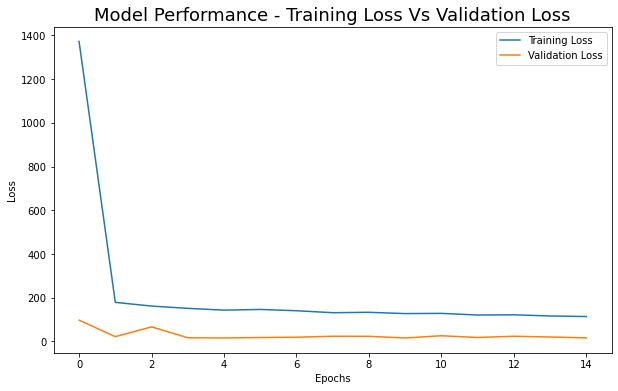

In [58]:
plt.figure(figsize=(10,6))
plt.plot(model_training.history['loss'],    label = 'Training Loss')
plt.plot(model_training.history['val_loss'],label = 'Validation Loss')

plt.title('Model Performance - Training Loss Vs Validation Loss',size = 18)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

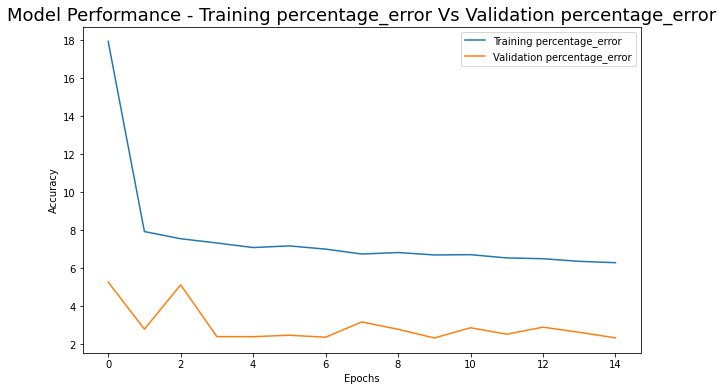

In [59]:
plt.figure(figsize=(10,6))
plt.plot(model_training.history['mean_absolute_percentage_error'],    label = 'Training percentage_error')
plt.plot(model_training.history['val_mean_absolute_percentage_error'],label = 'Validation percentage_error')

plt.title('Model Performance - Training percentage_error Vs Validation percentage_error',size = 18)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Understanding The Model performance with PLOTS

In [60]:
mean_lab=y_test.mean()
mean_lab_less=y_test<y_test.mean()
mean_lab_upper=y_test>y_test.mean()

### Plot of actual Test data

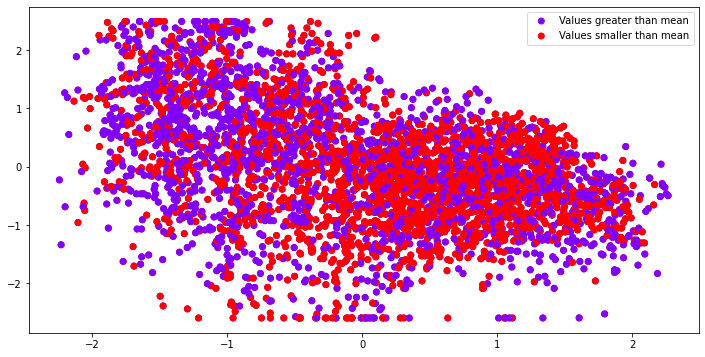

In [61]:
plt.figure(figsize=(12,6))
plt.scatter(X_test.iloc[:,0],X_test.iloc[:,1],c=mean_lab_upper.values,cmap='rainbow',label="Values greater than mean")
plt.scatter(X_test.iloc[:,0],X_test.iloc[:,1],c=mean_lab_less.values,cmap='rainbow',label="Values smaller than mean")
#plt.scatter(X_train.iloc[:,0],X_train.iloc[:,1],label="class_1",c=y_train.values==1,cmap='rainbow')
plt.legend(loc="best")

In [62]:
mean_lab=y_pred.mean()
mean_lab_less=y_pred<y_pred.mean()
mean_lab_upper=y_pred>y_pred.mean()

### Plot of Model prediction of test data

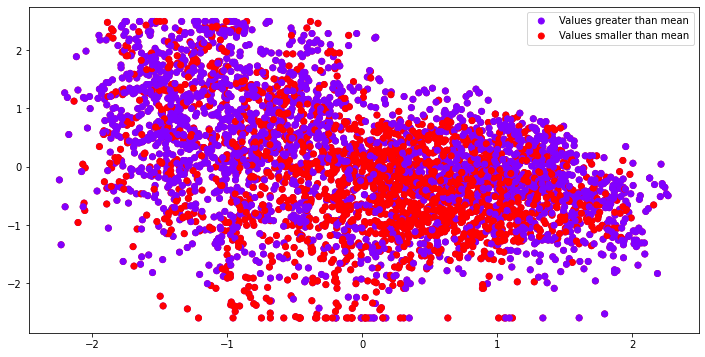

In [63]:
plt.figure(figsize=(12,6))
plt.scatter(X_test.iloc[:,0],X_test.iloc[:,1],c=mean_lab_upper,cmap='rainbow',label="Values greater than mean")
plt.scatter(X_test.iloc[:,0],X_test.iloc[:,1],c=mean_lab_less,cmap='rainbow',label="Values smaller than mean")
#plt.scatter(X_train.iloc[:,0],X_train.iloc[:,1],label="class_1",c=y_train.values==1,cmap='rainbow')
plt.legend(loc="best")

### Observation

### Model performs well